In [1]:
# Imports
import random

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

from src.utils import metrics
from src.utils import data_loader as d
from src.utils import models
from src.utils import sliding_window as s

SEED = 42
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
# Load Data
islas_dfs = d.local_data_loader(verbose=False)

# islas = ['Tenerife', 'Gran Canaria', 'Lanzarote', 'Fuerteventura', 'La Palma', 'La Gomera', 'El Hierro']
# windows = [9, 11, 11, 8, 7, 6, 19]

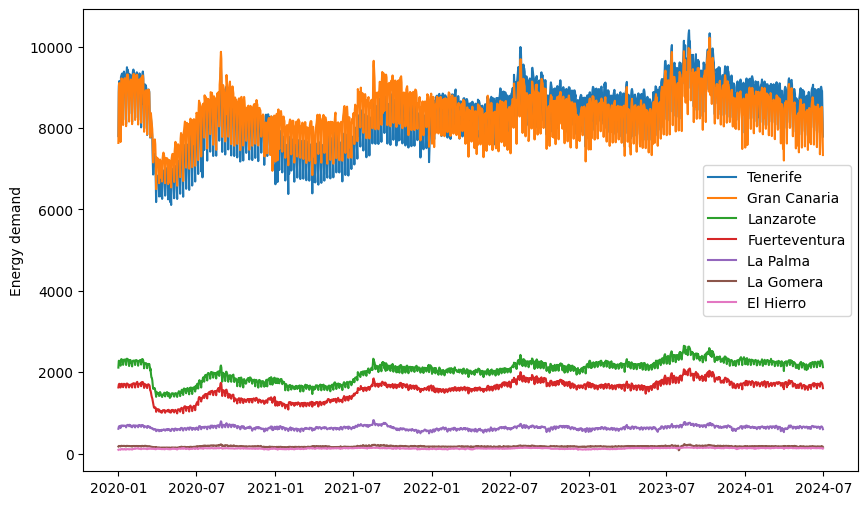

In [14]:
plt.figure(figsize=(10,6))
for key in islas_dfs.keys():
    plt.plot(islas_dfs[key]['TIME_PERIOD_CODE'],islas_dfs[key]['OBS_VALUE'], label = f'{key}')
    plt.ylabel('Energy demand')
    plt.legend()
plt.show()

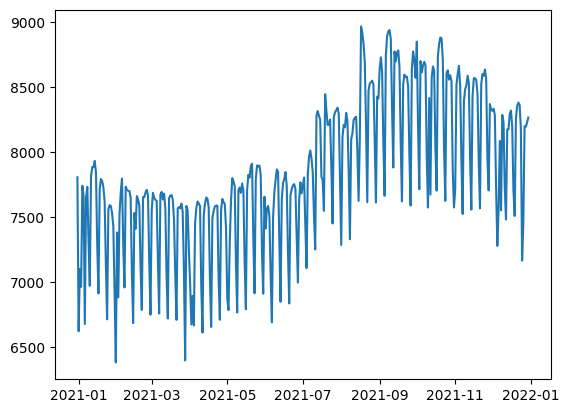

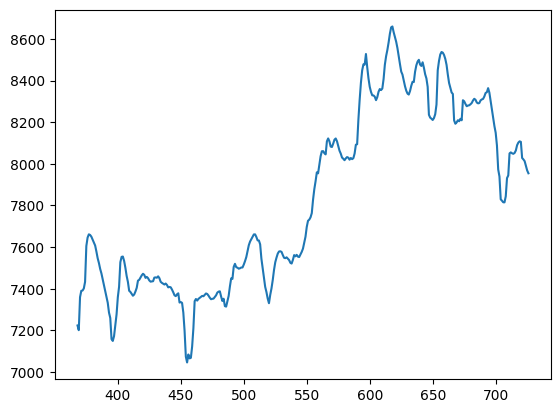

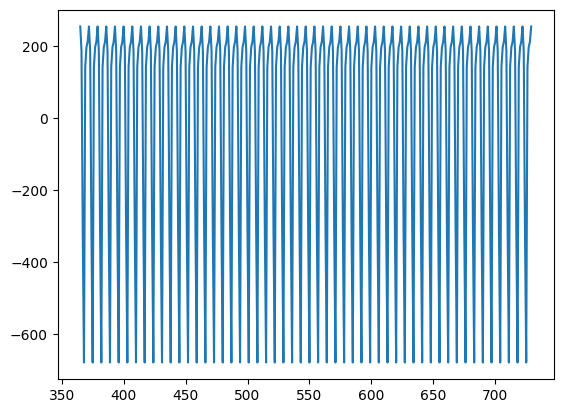

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

time = islas_dfs['Tenerife'][365:365*2]['TIME_PERIOD_CODE']
values = islas_dfs['Tenerife'][365:365*2]['OBS_VALUE']

plt.plot(time, values)
plt.show()

decomposition = seasonal_decompose(values, model='additive', period=7)
plt.plot(decomposition.trend)
plt.show()
plt.plot(decomposition.seasonal)
plt.show()

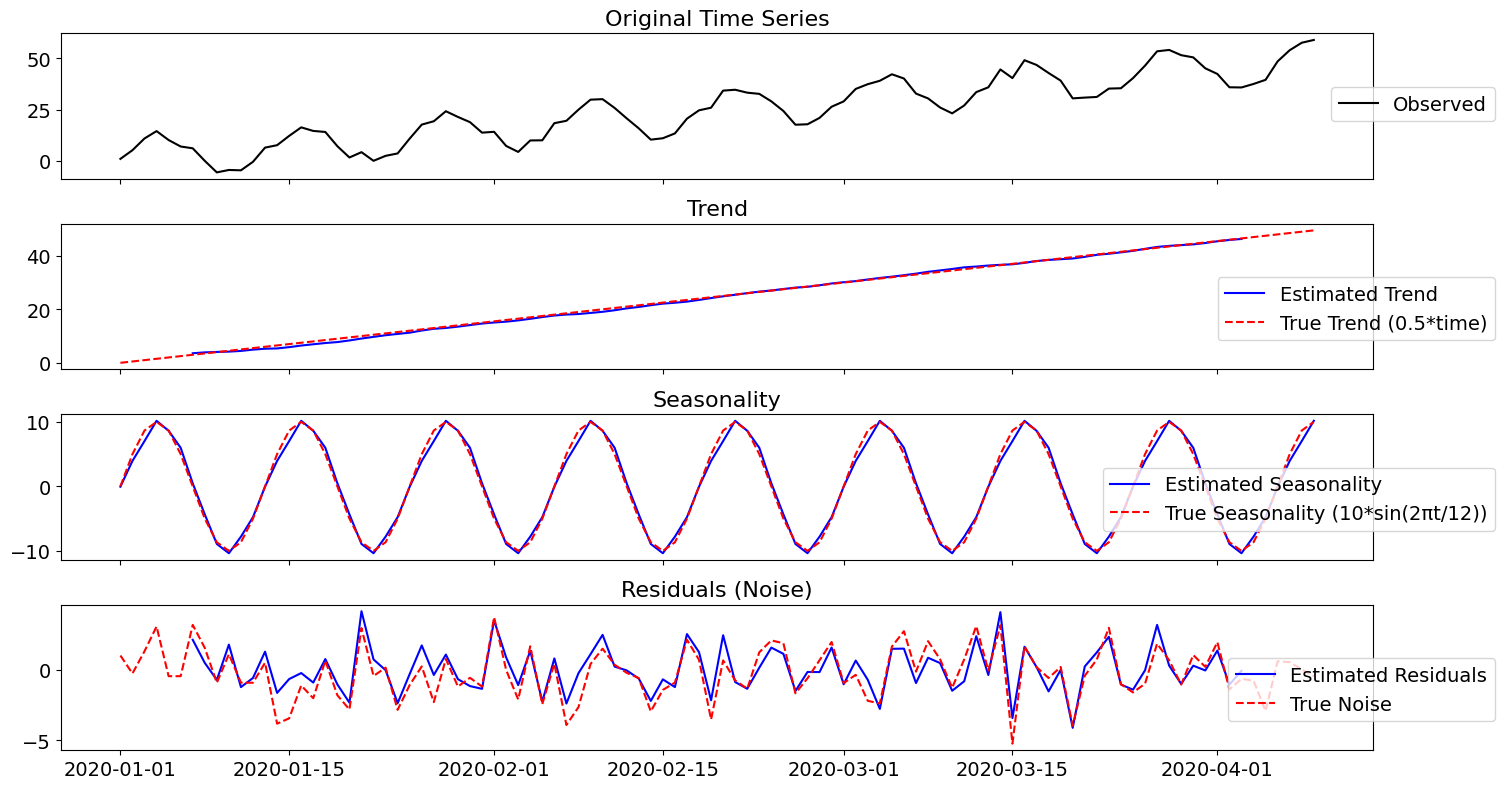

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate a sample time series
np.random.seed(42)
time = np.arange(100)
true_trend = 0.5 * time
true_seasonality = 10 * np.sin(2 * np.pi * time / 12)
true_noise = np.random.normal(scale=2, size=100)
series = true_trend + true_seasonality + true_noise

# Convert to a pandas DataFrame
df = pd.DataFrame({'value': series}, index=pd.date_range(start='2020-01-01', periods=100, freq='D'))

# Decompose the time series
decomposition = seasonal_decompose(df['value'], model='additive', period=12)

# Plot the decomposition with true functions
fig, axes = plt.subplots(4, 1, figsize=(15, 8), sharex=True)

# Original Series
axes[0].plot(df.index, df['value'], label='Observed', color='black')
axes[0].set_title('Original Time Series', fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)
axes[0].legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.1, 0.7))

# Trend
axes[1].plot(df.index, decomposition.trend, label='Estimated Trend', color='blue')
axes[1].plot(df.index, true_trend, label='True Trend (0.5*time)', linestyle='dashed', color='red')
axes[1].set_title('Trend', fontsize=16)
axes[1].legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.1, 0.7))
axes[1].tick_params(axis='both', labelsize=14)

# Seasonality
axes[2].plot(df.index, decomposition.seasonal, label='Estimated Seasonality', color='blue')
axes[2].plot(df.index, true_seasonality, label='True Seasonality (10*sin(2πt/12))', linestyle='dashed', color='red')
axes[2].set_title('Seasonality', fontsize=16)
axes[2].legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.1, 0.7))
axes[2].tick_params(axis='both', labelsize=14)

# Residuals (Noise)
axes[3].plot(df.index, decomposition.resid, label='Estimated Residuals', color='blue')
axes[3].plot(df.index, true_noise, label='True Noise', linestyle='dashed', color='red')
axes[3].set_title('Residuals (Noise)', fontsize=16)
axes[3].legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.1, 0.7))
axes[3].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()